In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | north bend
Processing Record 6 of Set 1 | phan rang
City not found. Skipping...
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | high level
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | bubaque
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | daru
Processing Record 16 of Set 1 | karlskrona
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | nhulunbuy
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | belushya guba
City not f

City not found. Skipping...
Processing Record 37 of Set 4 | kalomo
City not found. Skipping...
Processing Record 38 of Set 4 | salalah
Processing Record 39 of Set 4 | florianopolis
Processing Record 40 of Set 4 | portovelo
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | dingle
Processing Record 43 of Set 4 | vanavara
Processing Record 44 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 45 of Set 4 | jacksonville beach
Processing Record 46 of Set 4 | tautira
Processing Record 47 of Set 4 | cabedelo
Processing Record 48 of Set 4 | pilani
Processing Record 49 of Set 4 | severnyy
Processing Record 50 of Set 4 | phalombe
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | yellowknife
Processing Record 3 of Set 5 | bowen
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | chernyshevskiy
Processing Record 6 of Set 5 | chunskiy
Processing Record 7 of Set 5 | myitkyina
Pr

Processing Record 26 of Set 8 | dakar
Processing Record 27 of Set 8 | sao desiderio
Processing Record 28 of Set 8 | san juan
Processing Record 29 of Set 8 | shitanjing
Processing Record 30 of Set 8 | tarragona
Processing Record 31 of Set 8 | tilichiki
Processing Record 32 of Set 8 | dawei
Processing Record 33 of Set 8 | satitoa
City not found. Skipping...
Processing Record 34 of Set 8 | nikolayevsk-na-amure
Processing Record 35 of Set 8 | bathsheba
Processing Record 36 of Set 8 | puerto escondido
Processing Record 37 of Set 8 | borlange
City not found. Skipping...
Processing Record 38 of Set 8 | tambura
Processing Record 39 of Set 8 | samarai
Processing Record 40 of Set 8 | barra de sao francisco
Processing Record 41 of Set 8 | eskil
Processing Record 42 of Set 8 | palmer
Processing Record 43 of Set 8 | sorland
Processing Record 44 of Set 8 | santa lucia
Processing Record 45 of Set 8 | sretensk
Processing Record 46 of Set 8 | urla
Processing Record 47 of Set 8 | krasnyy yar
Processing 

Processing Record 11 of Set 12 | port blair
Processing Record 12 of Set 12 | muroto
Processing Record 13 of Set 12 | bridge of earn
Processing Record 14 of Set 12 | belton
Processing Record 15 of Set 12 | margate
Processing Record 16 of Set 12 | nabire
Processing Record 17 of Set 12 | tupik
Processing Record 18 of Set 12 | rock sound
Processing Record 19 of Set 12 | linxi
Processing Record 20 of Set 12 | pervomayskiy
Processing Record 21 of Set 12 | palaikastron
Processing Record 22 of Set 12 | mangrol
Processing Record 23 of Set 12 | sawtell
Processing Record 24 of Set 12 | ormstown
Processing Record 25 of Set 12 | dunmanway
Processing Record 26 of Set 12 | banda aceh
Processing Record 27 of Set 12 | makakilo city
Processing Record 28 of Set 12 | inuvik
Processing Record 29 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 30 of Set 12 | wad madani
Processing Record 31 of Set 12 | namatanai
Processing Record 32 of Set 12 | broome
Processing Record 33 of Set 12 | stil

In [68]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.68,156.12,45.32,82,100,24.00,RU,2020-10-23 17:59:50
1,Port Alfred,-33.59,26.89,73.08,77,71,3.74,ZA,2020-10-23 17:59:52
2,Ushuaia,-54.80,-68.30,48.20,57,40,4.70,AR,2020-10-23 17:59:52
3,Rikitea,-23.12,-134.97,73.90,78,41,4.90,PF,2020-10-23 17:59:52
4,North Bend,43.41,-124.22,54.00,87,1,8.05,US,2020-10-23 17:59:52
5,Hithadhoo,-0.60,73.08,82.72,77,6,11.99,MV,2020-10-23 17:59:53
6,High Level,58.52,-117.14,19.40,85,75,5.82,CA,2020-10-23 17:59:53
7,Torbay,47.67,-52.73,46.00,64,75,9.17,CA,2020-10-23 17:59:53
8,Vaini,-21.20,-175.20,71.60,88,20,6.93,TO,2020-10-23 17:59:53
9,Bubaque,11.28,-15.83,85.46,71,20,10.38,GW,2020-10-23 17:59:54


In [69]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2020-10-23 17:59:50,50.68,156.12,45.32,82,100,24.00
1,Port Alfred,ZA,2020-10-23 17:59:52,-33.59,26.89,73.08,77,71,3.74
2,Ushuaia,AR,2020-10-23 17:59:52,-54.80,-68.30,48.20,57,40,4.70
3,Rikitea,PF,2020-10-23 17:59:52,-23.12,-134.97,73.90,78,41,4.90
4,North Bend,US,2020-10-23 17:59:52,43.41,-124.22,54.00,87,1,8.05
5,Hithadhoo,MV,2020-10-23 17:59:53,-0.60,73.08,82.72,77,6,11.99
6,High Level,CA,2020-10-23 17:59:53,58.52,-117.14,19.40,85,75,5.82
7,Torbay,CA,2020-10-23 17:59:53,47.67,-52.73,46.00,64,75,9.17
8,Vaini,TO,2020-10-23 17:59:53,-21.20,-175.20,71.60,88,20,6.93
9,Bubaque,GW,2020-10-23 17:59:54,11.28,-15.83,85.46,71,20,10.38


In [70]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [71]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [72]:
# Import the time module.
import time

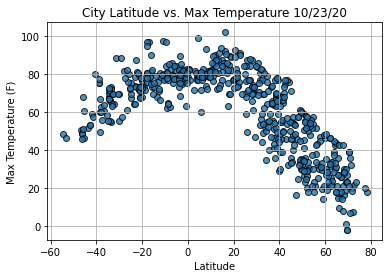

In [73]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

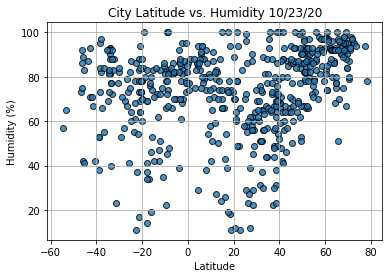

In [74]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

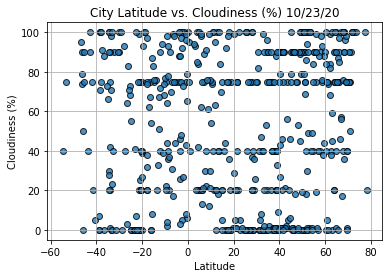

In [75]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

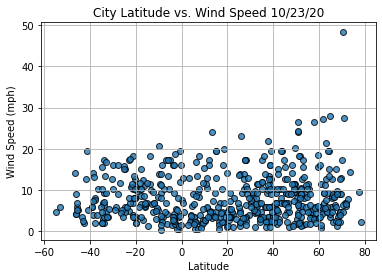

In [76]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [77]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [78]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [79]:
index13 = city_data_df.loc[13]
index13

City                   Karlskrona
Country                        SE
Date          2020-10-23 17:59:56
Lat                         56.16
Lng                         15.59
Max Temp                     51.8
Humidity                       87
Cloudiness                     75
Wind Speed                    4.7
Name: 13, dtype: object

In [89]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2020-10-23 17:59:50,50.68,156.12,45.32,82,100,24.00
4,North Bend,US,2020-10-23 17:59:52,43.41,-124.22,54.00,87,1,8.05
6,High Level,CA,2020-10-23 17:59:53,58.52,-117.14,19.40,85,75,5.82
7,Torbay,CA,2020-10-23 17:59:53,47.67,-52.73,46.00,64,75,9.17
9,Bubaque,GW,2020-10-23 17:59:54,11.28,-15.83,85.46,71,20,10.38


In [90]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

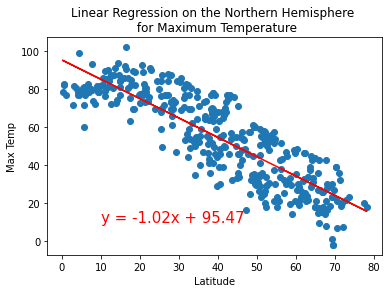

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(10,10))

In [92]:
# linear regression for Northern Hemisphere
print(linregress(x_values, y_values))

LinregressResult(slope=-1.0216034343865783, intercept=95.46628930231661, rvalue=-0.8598615006753106, pvalue=2.0383142858124867e-112, stderr=0.03119801579039693)


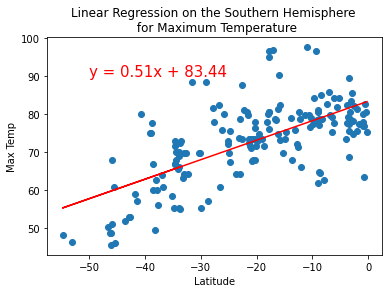

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp",(-50,90))

In [94]:
# linear regression for Southern Hemisphere
print(linregress(x_values, y_values))

LinregressResult(slope=0.5126322016524011, intercept=83.44344383091614, rvalue=0.6619908842200302, pvalue=1.4741597999426607e-23, stderr=0.04400051659000934)


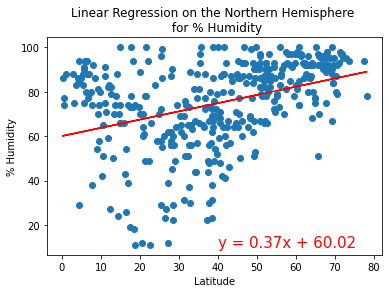

In [95]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity",(40,10))

In [96]:
# % Humidity linear regression for Northern Hemisphere
print(linregress(x_values, y_values))

LinregressResult(slope=0.37052177433258954, intercept=60.022827592874435, rvalue=0.37256560982521175, pvalue=5.87558434071808e-14, stderr=0.04746962348922902)


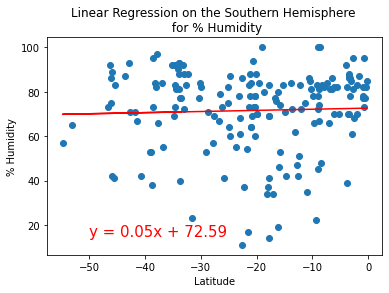

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [100]:
# % Humidity linear regression for Southern Hemisphere
print(linregress(x_values, y_values))

LinregressResult(slope=0.050830204280906566, intercept=72.59278009338979, rvalue=0.03742897677629859, pvalue=0.6218810713068268, stderr=0.10288092380814853)


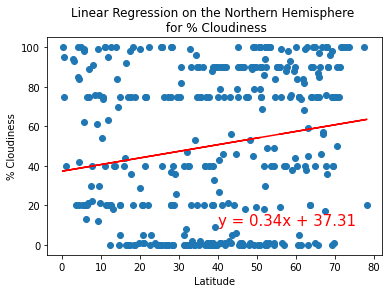

In [101]:
# % Cloudiness Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness",(40,10))

In [102]:
# % Cloudiness linear regression for Northern Hemisphere
print(linregress(x_values, y_values))

LinregressResult(slope=0.33504381530462723, intercept=37.3110254562175, rvalue=0.1729459668434712, pvalue=0.0007097669600512656, stderr=0.09814116569461741)


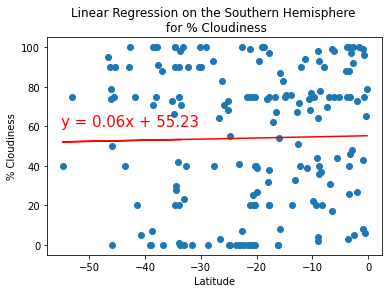

In [107]:
# % Cloudiness Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness",(-55,60))

In [108]:
# % Cloudiness linear regression for Southern Hemisphere
print(linregress(x_values, y_values))

LinregressResult(slope=0.0565581840789172, intercept=55.2291276508055, rvalue=0.02171804141905422, pvalue=0.7747991670226037, stderr=0.1973775387620764)


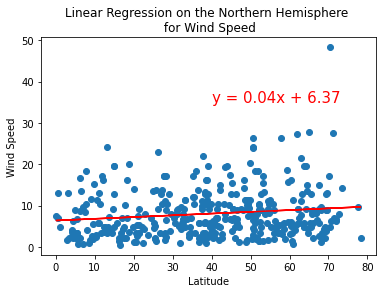

In [109]:
# Wind speed Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed", (40,35))

In [110]:
# Wind Speed linear regression for Northern Hemisphere
print(linregress(x_values, y_values))

LinregressResult(slope=0.04210792151717065, intercept=6.37293947755717, rvalue=0.14058956613589113, pvalue=0.006047154064614372, stderr=0.015252106264613076)


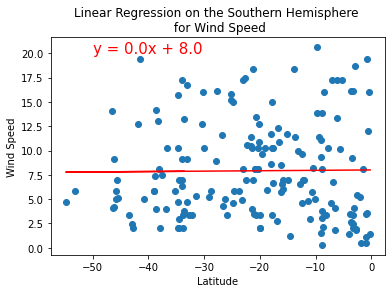

In [112]:
# Wind speed Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed",(-50,20))

In [113]:
# Wind Speed linear regression for Southern Hemisphere
print(linregress(x_values, y_values))

LinregressResult(slope=0.00411233317266714, intercept=8.001333306577894, rvalue=0.011256804487407191, pvalue=0.8821226197137587, stderr=0.027693065191639506)
